In [1]:
import pandas as pd
import sqlite3 as s3
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

go_sales = s3.connect('go_sales.sqlite')

order_details = pd.read_sql_query('SELECT * FROM order_details', go_sales)
order_header = pd.read_sql_query('SELECT * FROM order_header', go_sales)

In [2]:
merged = pd.merge(order_details, order_header, left_on='ORDER_NUMBER', how='inner', right_on='ORDER_NUMBER')
df = merged.loc[:, ['PRODUCT_NUMBER', 'QUANTITY', 'ORDER_DATE']]

df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])
df['MONTH'] = df['ORDER_DATE'].dt.month
df['YEAR'] = df['ORDER_DATE'].dt.year
df = df.drop('ORDER_DATE', axis=1)
sales_per_month = df.groupby(['YEAR', 'MONTH'])['QUANTITY'].sum().reset_index()
pd.DataFrame(sales_per_month)
# dataframe wordt gemaakt

,YEAR,MONTH,QUANTITY
0,2020,1,24896
1,2020,2,29672
2,2020,3,55142
3,2020,4,68598
4,2020,5,52480
5,2020,6,58858
6,2020,7,62852
7,2020,8,43388
8,2020,9,46996
9,2020,10,58290


In [3]:
x = sales_per_month.drop('QUANTITY', axis=1)
y = sales_per_month['QUANTITY']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
reg_model = LinearRegression().fit(x_train, y_train)

# 15% wordt gebruikt als test data en 85% als train data

y_pred = reg_model.predict(x_test)
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted Sales'})
prediction_df.astype(int)

# voorspellingen worden gemaakt

y_prediction_merge = pd.concat([y_test.reset_index()['QUANTITY'], prediction_df], axis = 1)
y_prediction_merge.loc[y_prediction_merge['Predicted Sales'].notna(), :]
y_prediction_merge['difference'] = y_prediction_merge['QUANTITY'] - y_prediction_merge['Predicted Sales']
y_prediction_merge

# verschil tussen voorspelling en werkelijke waarde wordt berekend en wordt weer in een dataframe weergegeven

,QUANTITY,Predicted Sales,difference
0,56498,87602.514671,-31104.514671
1,29534,57023.513664,-27489.513664
2,82716,73505.840395,9210.159605
3,68532,79771.028962,-11239.028962
4,53752,61722.405090,-7970.405090
5,58698,81337.326104,-22639.326104


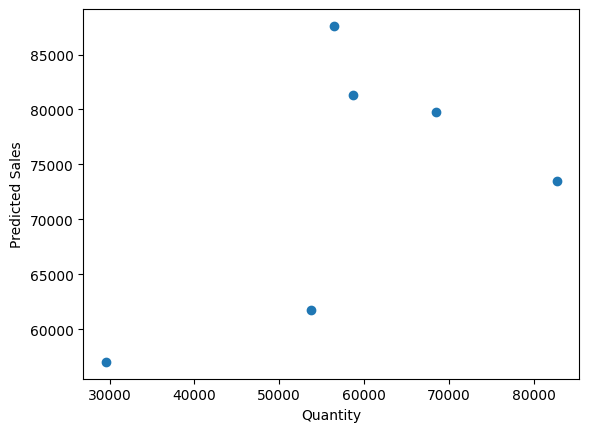

In [4]:
plt.scatter(y_prediction_merge['QUANTITY'], y_prediction_merge['Predicted Sales'])
plt.xlabel('Quantity')
plt.ylabel('Predicted Sales')
plt.show()

# als we een grotere test size gebruiken, dan zal de scatterplot er anders uitzien. De scatterplot zal dan meer verspreid zijn in de vorm van een schuine lineare lijn naar rechtsboven

In [5]:
mean_squared_error(y_prediction_merge['QUANTITY'], y_prediction_merge['Predicted Sales'])

418395575.01931787

In [6]:
x = sales_per_month.drop('QUANTITY', axis=1)
y = sales_per_month['QUANTITY']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
reg_model = LinearRegression().fit(x_train, y_train)

year_2023 = pd.DataFrame({'YEAR': [2023] * 12, 'MONTH': range(1, 13)})

predicted_quantities_2023 = reg_model.predict(year_2023)
prediction_2023_df = pd.DataFrame({'Year': year_2023['YEAR'], 'Month': year_2023['MONTH'], 'Predicted Sales': predicted_quantities_2023})
prediction_2023_df['Predicted Sales'] = prediction_2023_df['Predicted Sales'].astype(int)

prediction_2023_df

# hier wordt de voorspelling gemaakt voor 2023 per maand

,Year,Month,Predicted Sales
0,2023,1,85289
1,2023,2,86855
2,2023,3,88421
3,2023,4,89988
4,2023,5,91554
5,2023,6,93120
6,2023,7,94687
7,2023,8,96253
8,2023,9,97819
9,2023,10,99385


In [7]:
int(prediction_2023_df['Predicted Sales'].sum())

1126841